### NUWECASH DATA SCIENCE

In [64]:
import pandas as pd
import numpy as np

In [146]:
df = pd.read_csv("./J2D_train.csv")
df.head()

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00,14799.0,NaN,regular,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00
3,11322,50.0,approved,2020-08-07 11:01:30.51934+00,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               16105 non-null  int64  
 1   amount           16105 non-null  float64
 2   status           16105 non-null  object 
 3   created_at       16105 non-null  object 
 4   user_id          14218 non-null  float64
 5   money_back_date  9498 non-null   object 
 6   transfer_type    16105 non-null  object 
 7   send_at          8776 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1006.7+ KB


In [148]:
df.describe()

,id,amount,user_id
count,16105.000000,16105.000000,14218.000000
mean,9577.939770,87.722384,19328.963075
std,5495.677337,22.546287,13770.497673
min,3.000000,1.000000,34.000000
25%,4614.000000,80.000000,8074.000000
50%,9937.000000,100.000000,17029.500000
75%,14369.000000,100.000000,29726.500000
max,18614.000000,200.000000,57362.000000


In [149]:
# Parse Month ID for both created_at and send_at datetimes
df['created_at'] = pd.to_datetime(df['created_at'])
df['send_at'] = pd.to_datetime(df['send_at'])

minYear = int(min(df['created_at'].min().year, df['send_at'].min().year))

df.insert(4, column = 'created_at_month', value = df['created_at'].apply(lambda time: 12*(time.year - minYear) + time.month))
df.insert(9, column = 'send_at_month', value = df['send_at'].apply(lambda time: 12*(time.year - minYear) + time.month))
df

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0
...,...,...,...,...,...,...,...,...,...,...
16100,13302,100.0,rejected,2020-08-20 07:23:33.760027+00:00,20,29247.0,NaN,instant,2020-08-27 07:23:33.735377+00:00,20.0
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00:00,20,NaN,NaN,instant,2020-08-31 00:33:58.824223+00:00,20.0
16102,1522,100.0,approved,2020-05-02 08:54:49.586739+00:00,17,2562.0,2020-06-13 00:16:39.223405+00,regular,NaT,NaN
16103,7153,100.0,rejected,2020-07-08 12:56:16.163418+00:00,19,NaN,NaN,regular,NaT,NaN


In [150]:
df.head()

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0


**Data Analysis**

The only matter is null users (no possible identification)

In [151]:
nullUsers = df.loc[df['user_id'].isnull()]
print(nullUsers.shape)
nullUsers

(1887, 10)


,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
5,8110,100.0,rejected,2020-07-15 09:13:26.477317+00:00,19,NaN,NaN,regular,NaT,NaN
31,18341,100.0,rejected,2020-09-29 08:25:51.172466+00:00,21,NaN,NaN,instant,2020-10-06 08:25:51.126003+00:00,22.0
37,14998,50.0,rejected,2020-09-07 17:39:59.551790+00:00,21,NaN,NaN,instant,2020-09-14 17:39:59.493759+00:00,21.0
41,5399,100.0,rejected,2020-06-25 20:50:26.169548+00:00,18,NaN,NaN,regular,NaT,NaN
45,5792,100.0,approved,2020-06-29 14:35:10.782864+00:00,18,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...
16077,130,100.0,approved,2019-12-12 19:04:15.240544+00:00,12,NaN,NaN,regular,NaT,NaN
16079,12011,100.0,rejected,2020-08-11 14:55:07.406851+00:00,20,NaN,NaN,instant,2020-08-18 14:55:07.406299+00:00,20.0
16099,1399,100.0,approved,2020-04-27 16:47:02.126576+00:00,16,NaN,2020-05-19 20:06:01.595287+00,regular,NaT,NaN
16101,13710,100.0,rejected,2020-08-24 00:33:58.853099+00:00,20,NaN,NaN,instant,2020-08-31 00:33:58.824223+00:00,20.0


In [152]:
# Which of them have accepted transferences?
nullUsersWithTransference = nullUsers.loc[nullUsers['status'] == 'approved']
print(nullUsersWithTransference.shape)
nullUsersWithTransference.head()

(592, 10)


,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
45,5792,100.0,approved,2020-06-29 14:35:10.782864+00:00,18,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN
105,4923,100.0,approved,2020-06-24 07:49:18.790806+00:00,18,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN
106,331,100.0,approved,2019-12-28 12:43:52.108300+00:00,12,NaN,2020-03-12 23:30:36.947077+00,regular,NaT,NaN
134,7926,100.0,approved,2020-07-14 08:17:56.674292+00:00,19,NaN,2020-09-06 19:48:58.558665+00,regular,NaT,NaN
144,6585,100.0,approved,2020-07-04 13:03:22.981679+00:00,19,NaN,2020-07-29 22:00:00+00,regular,NaT,NaN


In [153]:
# Is user id unique?
df['user_id'].value_counts()

3377.0     18
2142.0     18
13851.0    17
1159.0     16
15219.0    16
           ..
28233.0     1
163.0       1
49612.0     1
40083.0     1
13483.0     1
Name: user_id, Length: 6029, dtype: int64

**1. Número de nuevos usarios por mes:**

In [154]:
unique_users_month = dict()     # {month_id : set(unique_users) }
created_users_month = dict()    # {month_id : number of created users}

uniqueMonths = sorted(df['created_at_month'].unique()) # Unique Months list

for i in range(len(uniqueMonths)):

    currentMonth = uniqueMonths[i]
    lastMonth = uniqueMonths[i - 1]
    
    # Unique users per Month 
    unique_users_month[currentMonth] = set(df.loc[df['created_at_month'] == currentMonth, 'user_id'].dropna())

    # Compute how much created users are per month
    if i == 0: created_users_month[currentMonth] = len(unique_users_month[currentMonth])
    else: created_users_month[currentMonth] = len(unique_users_month[currentMonth] - unique_users_month[lastMonth])

print(created_users_month)

{11: 1, 12: 204, 13: 90, 14: 112, 15: 111, 16: 271, 17: 415, 18: 1410, 19: 1397, 20: 991, 21: 2110}


Text(0.5, 0, 'Month ID')

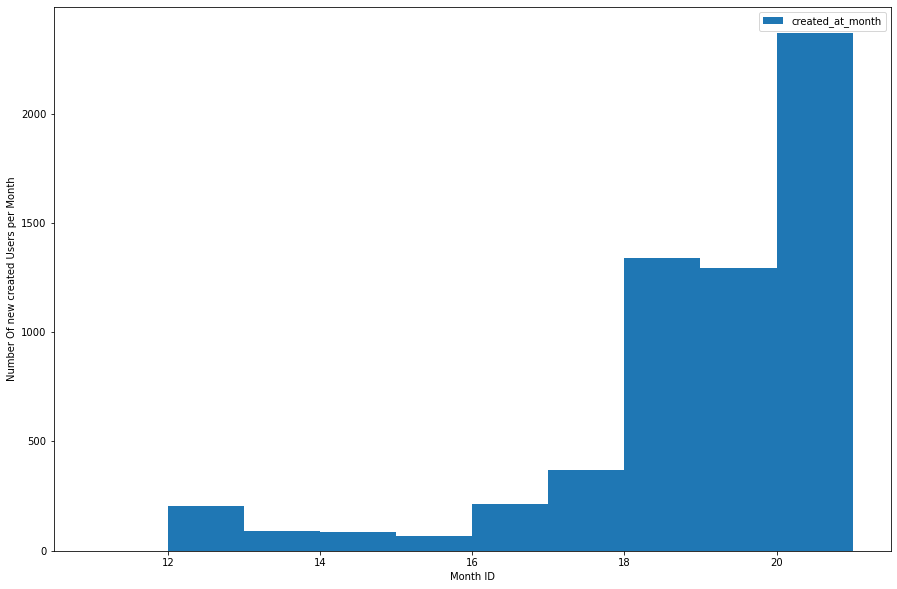

In [155]:
# 
minDatesPerUser = pd.DataFrame(df.groupby('user_id')['created_at_month'].min())
ax = minDatesPerUser.plot(kind = 'hist', figsize = (15, 10))
ax.set_ylabel("Number Of new created Users per Month")
ax.set_xlabel("Month ID")

In [156]:
dfnewusers=pd.DataFrame(minDatesPerUser.reset_index().groupby('created_at_month')['user_id'].count()).reset_index()

In [196]:
dfnewusers

,created_at_month,user_id
0,11,1
1,12,204
2,13,90
3,14,84
4,15,69
5,16,212
6,17,369
7,18,1338
8,19,1294
9,20,656


**2. Dinero total solicitado cada mes.**

In [158]:
df_eu_mes=df.groupby(['created_at_month'])['amount'].sum().reset_index()

In [200]:
df_eu_mes

,created_at_month,amount
0,11,1.0
1,12,27297.0
2,13,21587.0
3,14,16653.0
4,15,23549.0
5,16,46093.0
6,17,79236.0
7,18,246026.0
8,19,328187.0
9,20,287633.0


**3. Dinero medio solicitado por cada usuario al mes.**

In [176]:
dfmean1=df.groupby(['created_at_month'])['user_id'].count()
df_tot=df.groupby(['created_at_month'])['amount'].sum()
result = pd.concat([dfmean1, df_tot], axis=1)
result['mean']=result['amount']/result['user_id']
result.drop(['user_id','amount'], axis=1,inplace=True)
result=result.reset_index()
result

,created_at_month,mean
0,11,1.000000
1,12,118.682609
2,13,122.653409
3,14,106.070064
4,15,113.763285
5,16,110.270335
6,17,108.990371
7,18,109.296313
8,19,103.889522
9,20,93.085113


**4. Porcentaje de las solicitudes Aceptadas por cada Mes**

In [178]:
approvedStatusPerMonth = df[df['status'] == 'approved'].groupby('created_at_month')['status'].count()
rejectedStatusPerMonth = df[df['status'] == 'rejected'].groupby('created_at_month')['status'].count()

porcentaje=approvedStatusPerMonth / (approvedStatusPerMonth + rejectedStatusPerMonth)
porcentaje=porcentaje.reset_index()
porcentaje

,created_at_month,status
0,11,NaN
1,12,0.619377
2,13,0.497758
3,14,0.608696
4,15,0.692623
5,16,0.682875
6,17,0.728793
7,18,0.630593
8,19,0.559567
9,20,0.592918


In [201]:
porcentaje['status']=round(porcentaje['status']*100,2)

In [202]:
porcentaje

,created_at_month,status
0,11,NaN
1,12,61.94
2,13,49.78
3,14,60.87
4,15,69.26
5,16,68.29
6,17,72.88
7,18,63.06
8,19,55.96
9,20,59.29


**5. Número de solicitudes al mes que son aceptadas pero NO son devueltas.**

In [179]:
dfacc=df[df['status']=='approved']
dfacc=dfacc.groupby(['created_at_month']).count()
dfacc

,id,amount,status,created_at,user_id,money_back_date,transfer_type,send_at,send_at_month
created_at_month,,,,,,,,,
12,179,179,179,179,151,37,179,0,0
13,111,111,111,111,93,75,111,0,0
14,112,112,112,112,106,73,112,0,0
15,169,169,169,169,152,168,169,0,0
16,323,323,323,323,298,322,323,0,0
17,610,610,610,610,560,610,610,0,0
18,1649,1649,1649,1649,1505,1639,1649,0,0
19,2015,2015,2015,2015,1885,1951,2015,560,560
20,2026,2026,2026,2026,1941,1959,2026,2026,2026


In [180]:
dfacc['nodevueltas']=dfacc['transfer_type']-dfacc['money_back_date']
df_nodevueltas=dfacc['nodevueltas']
df_nodevueltas.columns =['Month', 'NoDevueltas_total']

In [181]:
df_nodevueltas=df_nodevueltas.reset_index()
df_nodevueltas

,created_at_month,nodevueltas
0,12,142
1,13,36
2,14,39
3,15,1
4,16,1
5,17,0
6,18,10
7,19,64
8,20,67
9,21,109


**6. Número de solicitudes al mes que son aceptadas y SÍ son devueltas.**

In [182]:
df_devueltas=dfacc.copy().reset_index()
df_devueltas=df_devueltas[['created_at_month','money_back_date']]
df_devueltas.columns =['created_at_month', 'Devueltas_total']
df_devueltas

,created_at_month,Devueltas_total
0,12,37
1,13,75
2,14,73
3,15,168
4,16,322
5,17,610
6,18,1639
7,19,1951
8,20,1959
9,21,2663


**7. Tiempo medio en devolver un préstamo (MM:DD:HH)**

In [85]:
senmont=df.groupby(['created_at_month'])['send_at']
creat=df.groupby(['created_at_month'])['created_at']

In [124]:
df1=df[df['status'] == 'approved']

In [125]:
df1

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month,timediff
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0,6 days 23:59:59.863193
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0,6 days 23:59:59.999610
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0,6 days 23:59:59.999634
6,13637,50.0,approved,2020-08-22 21:49:07.205490+00:00,20,4604.0,2020-09-08 19:27:06.237009+00,instant,2020-08-29 21:49:07.158273+00:00,20.0,6 days 23:59:59.952783
8,12784,100.0,approved,2020-08-17 11:35:13.809100+00:00,20,8231.0,2020-09-03 19:00:15.188417+00,regular,2020-08-24 11:35:13.744489+00:00,20.0,6 days 23:59:59.935389
...,...,...,...,...,...,...,...,...,...,...,...
16093,5887,100.0,approved,2020-06-30 10:30:25.246078+00:00,18,23070.0,2020-10-05 15:03:43.398617+00,regular,NaT,NaN,NaT
16095,2695,100.0,approved,2020-06-07 17:13:56.255097+00:00,18,400.0,2020-07-02 18:54:27.76911+00,regular,NaT,NaN,NaT
16097,12263,100.0,approved,2020-08-12 20:50:35.475256+00:00,20,33956.0,NaN,instant,2020-08-19 20:50:35.422422+00:00,20.0,6 days 23:59:59.947166
16099,1399,100.0,approved,2020-04-27 16:47:02.126576+00:00,16,NaN,2020-05-19 20:06:01.595287+00,regular,NaT,NaN,NaT


In [183]:
df['timediff']=(df['send_at'] - df['created_at'])

In [184]:
df['timediff']

0                          NaT
1       6 days 23:59:59.863193
2       6 days 23:59:59.999610
3       6 days 23:59:59.999634
4       6 days 23:59:59.975470
                 ...          
16100   6 days 23:59:59.975350
16101   6 days 23:59:59.971124
16102                      NaT
16103                      NaT
16104                      NaT
Name: timediff, Length: 16105, dtype: timedelta64[ns]

In [185]:
times=df.copy()
times=times[['created_at_month','timediff']]

In [186]:
times=times.dropna()
times['created_at_month'].value_counts()

21    4221
20    3417
19    1138
Name: created_at_month, dtype: int64

In [187]:
times1=times.groupby(['created_at_month'])['timediff'].mean()

In [188]:
times1

created_at_month
19   6 days 23:59:59.996692048
20   6 days 23:59:59.963597423
21   7 days 16:34:06.088777231
Name: timediff, dtype: timedelta64[ns]

**8. Cantidad de dinero que se presta cada mes.**

In [189]:
dfeachm=df.groupby('created_at_month')['amount'].sum().reset_index()

**9 Modelo de regressión**

In [98]:
df.head()

,id,amount,status,created_at,created_at_month,user_id,money_back_date,transfer_type,send_at,send_at_month
0,4405,100.0,rejected,2020-06-20 16:46:28.409042+00:00,18,14799.0,NaN,regular,NaT,NaN
1,13107,100.0,approved,2020-08-19 16:20:22.768375+00:00,20,8020.0,2020-09-24 22:23:28.213168+00,regular,2020-08-26 16:20:22.631568+00:00,20.0
2,11984,50.0,approved,2020-08-11 13:23:12.220906+00:00,20,27793.0,2020-11-19 23:00:00+00,instant,2020-08-18 13:23:12.220516+00:00,20.0
3,11322,50.0,approved,2020-08-07 11:01:30.519340+00:00,20,15409.0,2020-08-29 22:12:23.812361+00,instant,2020-08-14 11:01:30.518974+00:00,20.0
4,16755,50.0,rejected,2020-09-18 13:08:34.789948+00:00,21,39701.0,NaN,regular,2020-09-25 13:08:34.765418+00:00,21.0


In [ ]:
# Generated data from the dataset



#transformer = ColumnTransformer(OneHotEncoder)
#transformer.fit_transform(X[['country_code']])
encoded_categories = ['country_code', 'payment_status']
X_encoded = pd.get_dummies(X, columns = encoded_categories)#.drop(columns = encoded_categories)
X_encoded


In [95]:
df['created_at_month'].apply(lambda time: time.date).unique()

array([datetime.date(2020, 6, 20), datetime.date(2020, 8, 19),
       datetime.date(2020, 8, 11), datetime.date(2020, 8, 7),
       datetime.date(2020, 9, 18), datetime.date(2020, 7, 15),
       datetime.date(2020, 8, 22), datetime.date(2020, 9, 16),
       datetime.date(2020, 8, 17), datetime.date(2020, 9, 14),
       datetime.date(2020, 8, 2), datetime.date(2020, 7, 27),
       datetime.date(2020, 6, 11), datetime.date(2020, 9, 15),
       datetime.date(2020, 8, 3), datetime.date(2020, 9, 22),
       datetime.date(2020, 7, 22), datetime.date(2020, 9, 4),
       datetime.date(2020, 9, 11), datetime.date(2020, 5, 31),
       datetime.date(2020, 6, 16), datetime.date(2020, 7, 30),
       datetime.date(2020, 7, 7), datetime.date(2020, 9, 5),
       datetime.date(2020, 7, 8), datetime.date(2020, 9, 6),
       datetime.date(2020, 9, 29), datetime.date(2020, 6, 30),
       datetime.date(2020, 8, 15), datetime.date(2020, 9, 7),
       datetime.date(2020, 9, 27), datetime.date(2020, 3, 4),
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# entrenem el bosc aleatori
forest = RandomForestClassifier(criterion='gini', n_estimators=10000, random_state=0, n_jobs = 2)
forest.fit(X_train, Y_train)

In [129]:
#dfnewusers
#df_eu_mes _total solicitado mes
#result _dinero medio sol usuario mes
#porcentaje  porcentaje solicitudes mes
#df_nodevueltas - nodevueltas
#df_devueltas - si devueltas
#tiempor devuelto = 7 days
#dfeachm dinero cada mes

In [194]:
maindf = dfnewusers.merge(df_eu_mes,
                     on = "created_at_month", how='left').merge(result,
                     on = "created_at_month", how='left').merge(porcentaje,
                     on = "created_at_month", how='left').merge(df_nodevueltas,
                     on = "created_at_month", how='left').merge(df_devueltas,
                     on = "created_at_month", how='left').merge(dfeachm,
                     on = "created_at_month", how='left')

In [197]:
maindf['tiempo_dev']=7

In [198]:
maindf

,created_at_month,user_id,amount_x,mean,status,nodevueltas,Devueltas_total,amount_y,tiempo_dev
0,11,1,1.0,1.000000,NaN,NaN,NaN,1.0,7
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7


In [204]:
maindf.columns=['created_at_month','totalNewUser','totalRequested','mean_per_user','perc_approved','no_devueltas',
               'devueltas','realBudget','return_time']

In [205]:
maindf

,created_at_month,totalNewUser,totalRequested,mean_per_user,perc_approved,no_devueltas,devueltas,realBudget,return_time
0,11,1,1.0,1.000000,NaN,NaN,NaN,1.0,7
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7


In [227]:
def mes(n):
    if n==11:
        return 'November2019'
    elif n==12:
        return 'December2019'
    elif n==13:
        return 'January2020'
    elif n==14:
        return 'February2020'
    elif n==15:
        return 'March2020'
    elif n==16:
        return 'April2020'
    elif n==17:
        return 'May2020'
    elif n==18:
        return 'June2020'
    elif n==19:
        return 'July2020'
    elif n==20:
        return 'August2020'
    elif n==21:
        return 'September2020'
    
    
maindf['Month'] = maindf['created_at_month'].apply(mes)

In [232]:
maindf=maindf.fillna(0)
maindf

,created_at_month,totalNewUser,totalRequested,mean_per_user,perc_approved,no_devueltas,devueltas,realBudget,return_time,Month
0,11,1,1.0,1.000000,0.000000,0.0,0.0,1.0,7,November2019
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7,December2019
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7,January2020
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7,February2020
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7,March2020
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7,April2020
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7,May2020
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7,June2020
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7,July2020
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7,August2020


In [233]:
maindf.to_csv('nuwe_graf.csv')

### Unique users per month

In [236]:
df.groupby(['created_at_month'])['user_id'].value_counts()

created_at_month  user_id
11                47.0       1
12                1286.0     3
                  35.0       2
                  274.0      2
                  297.0      2
                            ..
21                57130.0    1
                  57178.0    1
                  57231.0    1
                  57289.0    1
                  57362.0    1
Name: user_id, Length: 11660, dtype: int64

In [225]:
unique=df.copy()
unique=unique[['created_at_month','user_id']].dropna()
unique

,created_at_month,user_id
0,18,14799.0
1,20,8020.0
2,20,27793.0
3,20,15409.0
4,21,39701.0
...,...,...
16097,20,33956.0
16098,18,19363.0
16100,20,29247.0
16102,17,2562.0


In [262]:
uniquedf=unique.groupby('created_at_month')['user_id'].nunique()

In [264]:
maindf = maindf.merge(uniquedf,
                     on = "created_at_month", how='left')

In [269]:
maindf

,created_at_month,totalNewUser,totalRequested,mean_per_user,perc_approved,no_devueltas,devueltas,realBudget,return_time,Month,totalUniqueUsers
0,11,1,1.0,1.000000,0.000000,0.0,0.0,1.0,7,November2019,1
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7,December2019,205
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7,January2020,159
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7,February2020,147
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7,March2020,183
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7,April2020,369
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7,May2020,636
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7,June2020,1835
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7,July2020,2418
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7,August2020,2384


In [268]:
maindf=maindf.rename(columns={'user_id':'totalUniqueUsers'})

In [270]:
totalusers=unique.groupby('created_at_month')['user_id'].count()

In [273]:
maindf = maindf.merge(totalusers,
                     on = "created_at_month", how='left')
maindf

,created_at_month,totalNewUser,totalRequested,mean_per_user,perc_approved,no_devueltas,devueltas,realBudget,return_time,Month,totalUniqueUsers,user_id_x,user_id_y
0,11,1,1.0,1.000000,0.000000,0.0,0.0,1.0,7,November2019,1,1,1
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7,December2019,205,230,230
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7,January2020,159,176,176
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7,February2020,147,157,157
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7,March2020,183,207,207
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7,April2020,369,418,418
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7,May2020,636,727,727
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7,June2020,1835,2251,2251
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7,July2020,2418,3159,3159
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7,August2020,2384,3090,3090


In [274]:
maindf=maindf.rename(columns={'user_id_x':'totalUsers'})


In [276]:
maindf.drop(['user_id_y'], axis=1,inplace=True)
maindf

,created_at_month,totalNewUser,totalRequested,mean_per_user,perc_approved,no_devueltas,devueltas,realBudget,return_time,Month,totalUniqueUsers,totalUsers
0,11,1,1.0,1.000000,0.000000,0.0,0.0,1.0,7,November2019,1,1
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7,December2019,205,230
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7,January2020,159,176
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7,February2020,147,157
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7,March2020,183,207
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7,April2020,369,418
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7,May2020,636,727
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7,June2020,1835,2251
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7,July2020,2418,3159
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7,August2020,2384,3090


In [277]:
maindf.to_csv('data_pol.csv')

In [278]:
maindf=maindf.rename(columns={'totalNewUser':'totalNewUsers','totalRequested':'totalRequestedMoney',
                             'mean_per_user':'perUserRequestedMoney','no_devueltas':'acceptedRequestedUnpaid',
                             'devueltas':'acceptedRequestedPaid','return_time':'loanReturnTime',
                             'Month':'nameUUID'})

In [301]:
maindf

,created_at_month,totalNewUsers,totalRequestedMoney,perUserRequestedMoney,perc_approved,acceptedRequestedUnpaid,acceptedRequestedPaid,realBudget,loanReturnTime,nameUUID,totalUniqueUsers,totalUsers,predicetdBudget
0,11,1,1.0,1.000000,0.000000,0.0,0.0,1.0,7,November2019,1,1,1.0
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7,December2019,205,230,27297.0
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7,January2020,159,176,21587.0
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7,February2020,147,157,16653.0
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7,March2020,183,207,23549.0
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7,April2020,369,418,46093.0
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7,May2020,636,727,79236.0
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7,June2020,1835,2251,246026.0
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7,July2020,2418,3159,328187.0
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7,August2020,2384,3090,287633.0


In [302]:
maindf['predicetdBudget']=maindf['realBudget']

In [303]:
maindf.to_csv('newnuweframe.csv')

In [304]:
defdf=maindf.copy()

In [305]:
defdf

,created_at_month,totalNewUsers,totalRequestedMoney,perUserRequestedMoney,perc_approved,acceptedRequestedUnpaid,acceptedRequestedPaid,realBudget,loanReturnTime,nameUUID,totalUniqueUsers,totalUsers,predicetdBudget
0,11,1,1.0,1.000000,0.000000,0.0,0.0,1.0,7,November2019,1,1,1.0
1,12,204,27297.0,118.682609,0.619377,142.0,37.0,27297.0,7,December2019,205,230,27297.0
2,13,90,21587.0,122.653409,0.497758,36.0,75.0,21587.0,7,January2020,159,176,21587.0
3,14,84,16653.0,106.070064,0.608696,39.0,73.0,16653.0,7,February2020,147,157,16653.0
4,15,69,23549.0,113.763285,0.692623,1.0,168.0,23549.0,7,March2020,183,207,23549.0
5,16,212,46093.0,110.270335,0.682875,1.0,322.0,46093.0,7,April2020,369,418,46093.0
6,17,369,79236.0,108.990371,0.728793,0.0,610.0,79236.0,7,May2020,636,727,79236.0
7,18,1338,246026.0,109.296313,0.630593,10.0,1639.0,246026.0,7,June2020,1835,2251,246026.0
8,19,1294,328187.0,103.889522,0.559567,64.0,1951.0,328187.0,7,July2020,2418,3159,328187.0
9,20,656,287633.0,93.085113,0.592918,67.0,1959.0,287633.0,7,August2020,2384,3090,287633.0


In [310]:
defdf['predicetdBudget'] = pd.to_numeric(defdf['predicetdBudget'], errors='coerce')

In [311]:
defdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at_month         11 non-null     float64
 1   totalNewUsers            11 non-null     float64
 2   totalRequestedMoney      11 non-null     float64
 3   perUserRequestedMoney    11 non-null     float64
 4   perc_approved            11 non-null     float64
 5   acceptedRequestedUnpaid  11 non-null     float64
 6   acceptedRequestedPaid    11 non-null     float64
 7   realBudget               11 non-null     float64
 8   loanReturnTime           11 non-null     float64
 9   nameUUID                 13 non-null     object 
 10  totalUniqueUsers         11 non-null     float64
 11  totalUsers               11 non-null     float64
 12  predicetdBudget          13 non-null     float64
dtypes: float64(12), object(1)
memory usage: 1.4+ KB


In [309]:
defdf = defdf.append(df2, ignore_index = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at_month         11 non-null     float64
 1   totalNewUsers            11 non-null     float64
 2   totalRequestedMoney      11 non-null     float64
 3   perUserRequestedMoney    11 non-null     float64
 4   perc_approved            11 non-null     float64
 5   acceptedRequestedUnpaid  11 non-null     float64
 6   acceptedRequestedPaid    11 non-null     float64
 7   realBudget               11 non-null     float64
 8   loanReturnTime           11 non-null     float64
 9   nameUUID                 13 non-null     object 
 10  totalUniqueUsers         11 non-null     float64
 11  totalUsers               11 non-null     float64
 12  predicetdBudget          13 non-null     object 
dtypes: float64(11), object(2)
memory usage: 1.4+ KB


In [288]:
df2 = {'nameUUID': 'October2020', 'predicetdBudget': '465099.0'}

In [299]:
defdf = defdf.append(df2, ignore_index = True)
defdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_at_month         11 non-null     float64
 1   totalNewUsers            11 non-null     float64
 2   totalRequestedMoney      11 non-null     float64
 3   perUserRequestedMoney    11 non-null     float64
 4   perc_approved            11 non-null     float64
 5   acceptedRequestedUnpaid  11 non-null     float64
 6   acceptedRequestedPaid    11 non-null     float64
 7   realBudget               11 non-null     float64
 8   loanReturnTime           11 non-null     float64
 9   nameUUID                 13 non-null     object 
 10  totalUniqueUsers         11 non-null     float64
 11  totalUsers               11 non-null     float64
 12  predicetdBudget          13 non-null     object 
dtypes: float64(11), object(2)
memory usage: 1.4+ KB


In [291]:
defdf.to_csv('newnuweframe1.csv')

<br><br><br><br><br><br>
# Predicció

In [294]:
amountPerMonth = df.groupby('created_at_month')['amount'].sum()
amountPerMonth

created_at_month
11         1.0
12     27297.0
13     21587.0
14     16653.0
15     23549.0
16     46093.0
17     79236.0
18    246026.0
19    328187.0
20    287633.0
21    336507.0
Name: amount, dtype: float64

### linear regression

In [295]:
# Entrenem un model de regressió amb scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(amountPerMonth).index.values.reshape(-1, 1)
Y_train =  pd.DataFrame(amountPerMonth).values.reshape(-1, 1)

X_pred = np.arange(X_train.min(), X_train.max() + 2).reshape(-1, 1)

# Inicialitzem ¡dos! estandaritzadors, un per cada variable inclosa la variable Y
#sc_x = StandardScaler()
#sc_y = StandardScaler()

# Entrenem un model de regressió
slr = LinearRegression()
slr.fit(X_train, Y_train)

# Prediction!
Y_pred = slr.predict(X_pred)

# Mostrem els pesos
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' %slr.intercept_)

Slope: 37800.973
Intercept: -476382.018


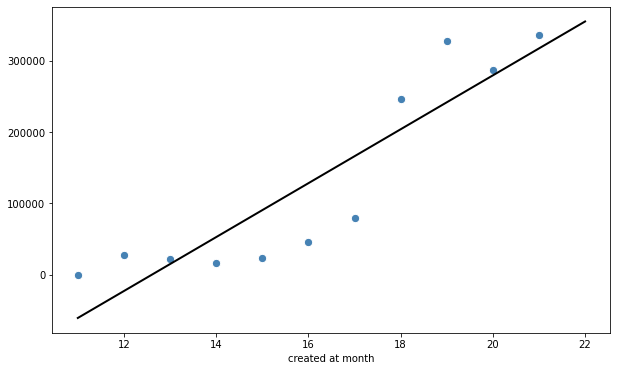

Predicted value for October 2020: 355239.00$
R² score for linear regression: 81.35%


In [296]:


from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# Mostrem la recta de regressió del model slr
plt.figure(figsize = (10, 6))
plt.scatter(X_train, Y_train, c = 'steelblue', edgecolor = 'white', s = 70)
plt.plot(X_pred, Y_pred, color = 'black', lw = 2)
plt.xlabel("created at month")
plt.show()

predictedOctoberValue = slr.predict([[X_train.max() + 1]])

print(f"Predicted value for October 2020: %.2f$" % np.round(predictedOctoberValue[0][0]))
print(f"R² score for linear regression: %.2f%%" % (r2_score(Y_train, Y_pred[:-1]) * 100))



### Quadratic Model

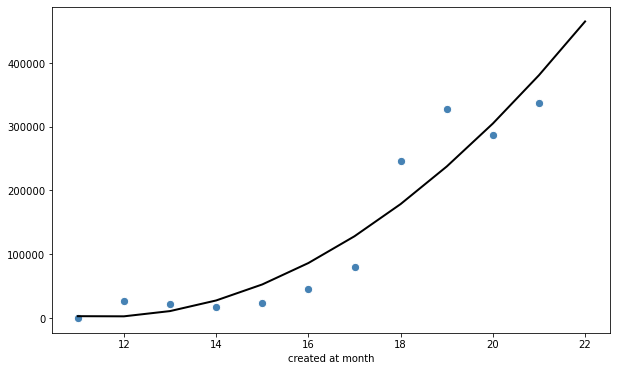

Predicted value for October 2020: 465099.00$
R² score for linear regression: 89.28%


In [297]:


from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()

# Tranformem el conjunt X per la regressió polinomial (grau 2)
polinomial = PolynomialFeatures(degree = 2)

X_polyn = polinomial.fit_transform(X_train)
X_polyn_predict = polinomial.fit_transform(X_pred)

# Entrenem el model polinomial
pr.fit(X_polyn, Y_train)

# Prediction!
Y_pred = pr.predict(X_polyn_predict)

plt.figure(figsize = (10, 6))
plt.scatter(X_train, Y_train, c = 'steelblue', edgecolor = 'white', s = 70)
plt.plot(X_pred, Y_pred, color = 'black', lw = 2)
plt.xlabel("created at month")
plt.show()

predictedOctoberValue = Y_pred[-1]

print(f"Predicted value for October 2020: %.2f$" % np.round(predictedOctoberValue[0]))
print(f"R² score for linear regression: %.2f%%" % (r2_score(Y_train, Y_pred[:-1]) * 100))



### Manual GridSearch

In [298]:
# Manual gridsearch
for n in range(1, 7):

    # Polinomycal Regressor
    pr = LinearRegression()

    # Tranformem el conjunt X per la regressió polinomial
    polinomial = PolynomialFeatures(degree = n)

    X_polyn = polinomial.fit_transform(X_train)
    X_polyn_predict = polinomial.fit_transform(X_pred)

    # Entrenem el model polinomial
    pr.fit(X_polyn, Y_train)

    # Prediction!
    Y_pred = pr.predict(X_polyn_predict)

    score = r2_score(Y_train, Y_pred[:-1])
    print("R^2 score for polynomical regression of degree %i: %.4f" %(n, score))

R^2 score for polynomical regression of degree 1: 0.8135
R^2 score for polynomical regression of degree 2: 0.8928
R^2 score for polynomical regression of degree 3: 0.9148
R^2 score for polynomical regression of degree 4: 0.9580
R^2 score for polynomical regression of degree 5: 0.9606
R^2 score for polynomical regression of degree 6: 0.9798
